In [1]:
#coding:utf-8
import os
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
anime_csv = '../sample_data/anime.csv'

df = pd.read_csv(anime_csv)

df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


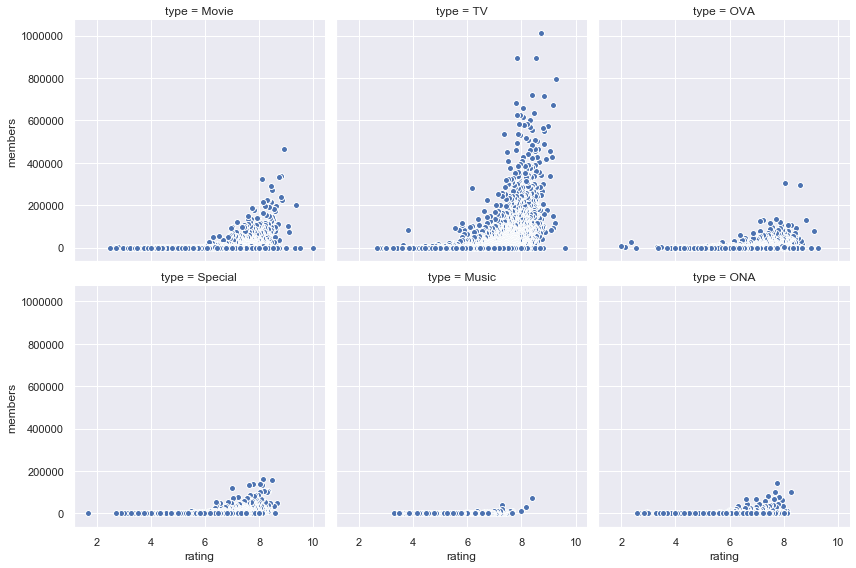

In [3]:
g = sns.FacetGrid(df, col='type', col_wrap=3, height=4)
g = g.map(plt.scatter, 'rating', 'members', edgecolor='white')

In [ ]:
g = sns.FacetGrid(df, col='type',col_wrap=3, height=4, hue='type',palette='rainbow')
g = g.map(plt.hist, 'rating', bins=np.arange(0, 10, 1))